# Global sea level budget
Check how the components add up


In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../code')
import SeaLevelContrib as slc
import matplotlib.pyplot as plt
import importlib

/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [79]:
importlib.reload(slc)

<module 'SeaLevelContrib' from '/Users/dewi/Work/Project_SeaLevelBudgets/Notebooks/SeaLevelContrib.py'>

In [24]:
def deep_steric_PJ10(first_year, last_year):
    '''Deep ocean bellow 2000m contribution to global mean sea level in cm/year'''
    deep_steric = (np.arange(first_year,last_year) - first_year)*0.01
    deep_steric_df = pd.DataFrame(data={'time':np.arange(first_year,last_year), 
                                        'deep_steric':deep_steric})
    deep_steric_df = deep_steric_df.set_index('time')
    return deep_steric_df

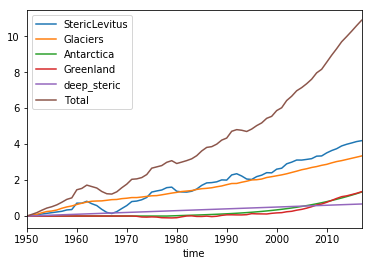

In [25]:
GloSLDang19_df = slc.GloSLDang19()

glac_df = slc.glaciers_m15(tg_id = None, extrap=True, del_green=True)
ant_df = slc.ant_rignot19()  #imbie or rignot19
#ant_df = slc.ant_imbie_glo(extrap=True) 
green_df = slc.green_mouginot19_glo()
tws_df = slc.tws_glo_humphrey19()

#Purkey and Johnson 0.1mm/year
deep_steric_df = deep_steric_PJ10(1950, 2020)

sealevel_df = slc.LevitusSL(extrap_back = True)
# Extrapollate to 1950?
#sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, tws_df], how='inner')
sealevel_df = sealevel_df.join([glac_df, ant_df, green_df, deep_steric_df], how='inner')
sealevel_df = sealevel_df - sealevel_df.loc[1950]

sealevel_df['Total'] = sealevel_df.sum(axis=1)
sealevel_df.index.names = ['time']

sealevel_df.plot()

In [26]:
#sealevel_df.plot() #.iloc[-10:]
sealevel_df.loc[1950:]

,StericLevitus,Glaciers,Antarctica,Greenland,deep_steric,Total
time,,,,,,
1950,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1951,0.037695,0.044387,0.000000,0.000000,0.01,0.092082
1952,0.075390,0.093377,0.000000,0.000000,0.02,0.188766
1953,0.113085,0.180265,0.000000,0.000000,0.03,0.323350
1954,0.150780,0.251949,0.000000,0.000000,0.04,0.442728
1955,0.188474,0.280445,0.000000,0.000000,0.05,0.518920
1956,0.226169,0.336140,0.000000,0.000000,0.06,0.622310
1957,0.263864,0.431816,0.000000,0.000000,0.07,0.765680
1958,0.339237,0.507181,0.000000,0.000000,0.08,0.926418


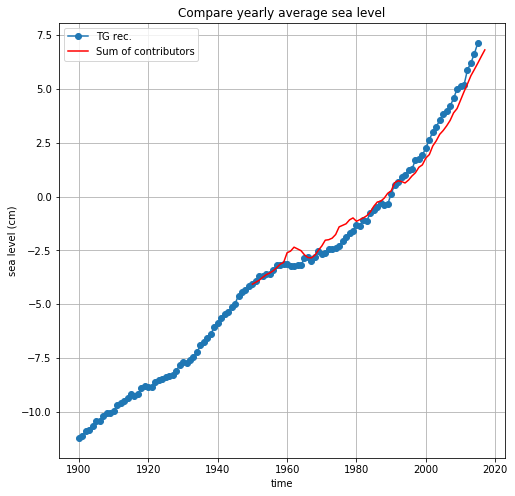

In [27]:
#Plot time series
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(GloSLDang19_df - GloSLDang19_df.loc[1953:2018].mean(), 'o-', label='TG rec.')
ax.plot(sealevel_df.Total - sealevel_df.Total.mean() , 'r-', label='Sum of contributors')

#ax.set_aspect(1)
#ax.set_xlim([ys,2020])
plt.xlabel('time')
plt.ylabel('sea level (cm)')
plt.title('Compare yearly average sea level')
ax.grid(True)
plt.legend(loc='upper left')

The sum of contributors is not high enough compared to the reconstruction. Could missing glaciers and deep ocean fill the gap?
Deep ocean OHC increase is around 5% of the top 2000m (Zanna et al. 2019 consistent with Gebbie et al. 2019) . This is not enough to bridge the gap.